In [3]:
import pandas as pd
rf_feature_imp = pd.read_csv("../data/curated/RF_feature_importance.csv")
xgb_feature_imp = pd.read_csv('../data/curated/feature_importance_xgboost.csv')

In [4]:
rf_feature_imp.rename(columns={'Unnamed: 0': 'Feature'}, inplace=True)
rf_feature_imp.head(5)


,Feature,importance
0,Baths,0.203269
1,Beds,0.157216
2,SA2 code_x,0.141317
3,Top 10%,0.061924
4,HHS_2036,0.048766


In [5]:
xgb_feature_imp = xgb_feature_imp.drop("Unnamed: 0", axis=1)
xgb_feature_imp.head(5)

,Feature,Importance
0,Beds,0.018021
1,Baths,0.071697
2,Parking,0.004923
3,chg_flag,0.000062
4,ste_code,0.000000


In [6]:
# Correct way to rename without reassigning
rf_feature_imp.rename(columns={'importance': 'rf_importance'}, inplace=True)
xgb_feature_imp.rename(columns={'Importance': 'xgb_importance'}, inplace=True)

# Now you can merge without issues
combined_feature_imp = pd.merge(rf_feature_imp, xgb_feature_imp, on='Feature', how='outer')

# Fill NaN values with 0 (in case a feature is present in one model but not the other)
combined_feature_imp.fillna(0, inplace=True)

# Calculate an aggregated importance score (e.g., average of RF and XGB importances)
combined_feature_imp['avg_importance'] = (combined_feature_imp['rf_importance'] + combined_feature_imp['xgb_importance']) / 2

# Sort by the aggregated importance score in descending order
combined_feature_imp = combined_feature_imp.sort_values(by='avg_importance', ascending=False)

# Select the top 10 features
top_10_features = combined_feature_imp.head(10)

# Display the top 10 features
top_10_features

,Feature,rf_importance,xgb_importance,avg_importance
2,SA2 code_x,0.141317,0.144212,0.142764
0,Baths,0.203269,0.071697,0.137483
1,Beds,0.157216,0.018021,0.087619
11,Mean,0.021493,0.060716,0.041105
3,Top 10%,0.061924,0.010491,0.036207
4,HHS_2036,0.048766,0.021432,0.035099
13,Highest Quartile,0.015704,0.053222,0.034463
5,cbd_distance_km,0.042036,0.006919,0.024478
17,Gini coefficient,0.008985,0.036351,0.022668
7,distance_to_closest_school,0.030947,0.002116,0.016532


In [17]:
# Replace 'SA2 code_x' with 'SA2 code' in the 'Feature' column
top_10_features['Feature'] = top_10_features['Feature'].replace('SA2 code_x', 'SA2 code')

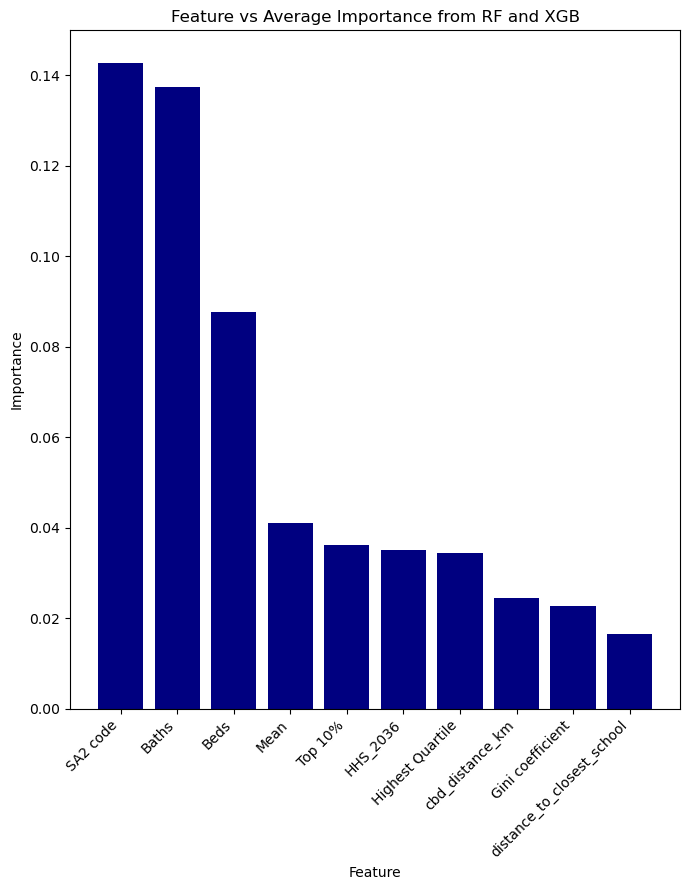

In [20]:
import matplotlib.pyplot as plt

# Assuming 'top_10_features' DataFrame has the columns 'Feature' and 'avg_importance'
plt.figure(figsize=(7,9))

# Creating the bar plot with dark navy color
plt.bar(top_10_features['Feature'], top_10_features['avg_importance'], color='#000080')  # Dark navy color

# Adding labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature vs Average Importance from RF and XGB')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()
